<a href="https://colab.research.google.com/github/mfvalle/Maths_for_MachineLearning/blob/main/Random_Forests_%26_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/mfvalle/Maths_for_MachineLearning.git

Cloning into 'Maths_for_MachineLearning'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 82 (delta 3), reused 0 (delta 0), pack-reused 67
Unpacking objects: 100% (82/82), 1.53 MiB | 5.35 MiB/s, done.


# [Find the Flag](https://archive.ics.uci.edu/ml/datasets/Flags)

This data file contains details of various nations and their flags. In this file the fields are separated by spaces (not commas). With this data we can try things like predicting the religion of a country from its size and the colours in its flag.

![flag.png](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Proposed_flag_of_R%C3%A9union_%28VAR%29.svg/300px-Proposed_flag_of_R%C3%A9union_%28VAR%29.svg.png)



We will explore which features are the best to use and the best way to create a decision tree to guess which continent this flag comes from.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

flags = pd.read_csv('/content/Maths_for_MachineLearning/flag.data.cvs', header=0)

# See what the data looks like
print(flags.columns)
print(flags.head())

"""
column_names = flags.keys()
print(column_names)
"""
# Add header to dataframe
flags.columns=["Name", "Landmass", "Zone", "Area", "Population", "Language", "Religion", "Bars", "Stripes", "Colors",
               "Red", "Green",	"Blue", "Gold", "White", "Black", "Orange", "Mainhue", "Circles", "Crosses",	"Saltires",
               "Quarters",	"Sunstars",	"Crescent",	"Triangle",	"Icon",	"Animate", "Text", "Topleft",	"Botright"]
            
flags.head()


Index(['Afghanistan', '5', '1', '648', '16', '10', '2', '0', '3', '5.1', '1.1',
       '1.2', '0.1', '1.3', '1.4', '1.5', '0.2', 'green', '0.3', '0.4', '0.5',
       '0.6', '1.6', '0.7', '0.8', '1.7', '0.9', '0.10', 'black', 'green.1'],
      dtype='object')
      Afghanistan  5  1   648  16  10  2  0  3  5.1  ...  0.5  0.6  1.6  0.7  \
0         Albania  3  1    29   3   6  6  0  0    3  ...    0    0    1    0   
1         Algeria  4  1  2388  20   8  2  2  0    3  ...    0    0    1    1   
2  American-Samoa  6  3     0   0   1  1  0  0    5  ...    0    0    0    0   
3         Andorra  3  1     0   0   6  0  3  0    3  ...    0    0    0    0   
4          Angola  4  2  1247   7  10  5  0  2    3  ...    0    0    1    0   

   0.8  1.7  0.9 0.10  black  green.1  
0    0    0    1    0    red      red  
1    0    0    0    0  green    white  
2    1    1    1    0   blue      red  
3    0    0    0    0   blue      red  
4    0    1    0    0    red    black  

[5 rows x 30 column

,Name,Landmass,Zone,Area,Population,Language,Religion,Bars,Stripes,Colors,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,Topleft,Botright
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
3,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
4,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black


In [ ]:

#Determine Landmass a country is on
labels = flags[['Landmass']]

# Choose RANDOMLY which columns will help our decision tree correctly classify those labels
data = flags[["Red", "Green", "Blue", "Gold", "White", "Black", "Orange"]]

# Split DataFrames into a training set and test set
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

# Create and fit decision tree
tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data, train_labels)

# Score of RANDOM feature selection
score = tree.score(test_data, test_labels)
print("Accuracy:", score)

Accuracy: 0.32653061224489793


# Tuning the Model
Now we wil see if we can prune the tree to make it better

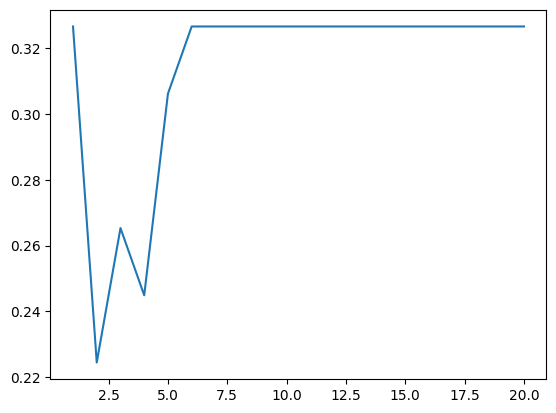

In [ ]:
#Create, train, and test the tree at different depths
scores = []
for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  #Fit the tree
  tree.fit(train_data,train_labels)
  #Print the tree's score
  scores.append(tree.score(test_data, test_labels))
  
plt.plot(range(1,21), scores)
plt.show()


It seems like the depth of the tree isn’t really having an impact on its performance. This might be a good indication that we’re not using enough features. So we add all the features that have to do with shapes to our data above.

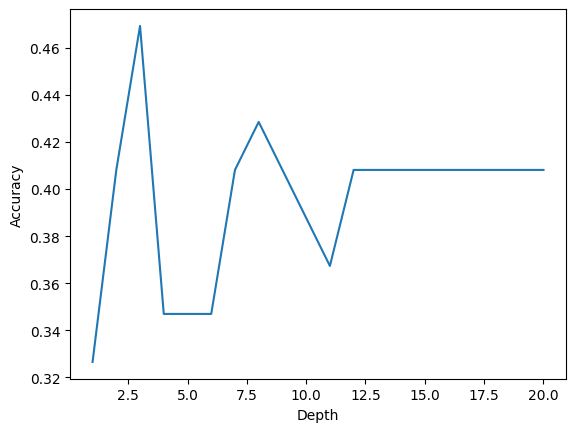

In [ ]:
#Now we create trees at different depths with all features:

#Determine Landmass a country is on
labels = flags[['Landmass']]

#Add all the features that have to do with shapes to our data
data = flags[["Red", "Green", "Blue", "Gold",
 "White", "Black", "Orange",
 "Circles",
"Crosses","Saltires","Quarters","Sunstars",
"Crescent","Triangle"]]

# Split DataFrames into a training set and test set
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, random_state=1)

# Create and fit decision tree
tree = DecisionTreeClassifier(random_state=1)
tree.fit(train_data, train_labels)

#Create, train, and test the tree at different depths
scores = []
for i in range(1,21):
  tree = DecisionTreeClassifier(random_state = 1, max_depth = i)
  #Fit the tree
  tree.fit(train_data,train_labels)
  #Print the tree's score
  scores.append(tree.score(test_data, test_labels))
  #print(tree.score(test_data, test_labels))

plt.plot(range(1,21), scores)
plt.xlabel("Depth")
plt.ylabel("Accuracy")
plt.show()

If the tree is too short, we’re underfitting and not accurately representing the training data. If the tree is too big, we’re getting too specific and relying too heavily on the training data.


#[Income Classification using Random Forest](https://archive.ics.uci.edu/ml/datasets/census%20income)

By using this census data with a random forest, we will try to predict whether or not a person makes more than $50,000.

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


# Investigate the data available
income_data = pd.read_csv("/content/Maths_for_MachineLearning/adult.data.cvs", header = 0, delimiter = ", ")
print(income_data.iloc[0])

# Add header to dataframe
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
income_data = pd.read_csv('/content/Maths_for_MachineLearning/adult.data.cvs',header = None, names = col_names)

income_data.head()


39                               50
State-gov          Self-emp-not-inc
77516                         83311
Bachelors                 Bachelors
13                               13
Never-married    Married-civ-spouse
Adm-clerical        Exec-managerial
Not-in-family               Husband
White                         White
Male                           Male
2174                              0
0                                 0
40                               13
United-States         United-States
<=50K                         <=50K
Name: 0, dtype: object


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:

# Format the data for Scikit-learn
labels = income_data[['income']]

#print(income_data["native-country"].value_counts())

#Transform strings column to integer
income_data["sex_int"] = income_data["sex"].apply(lambda row: 0 if row == "Male" else 1)
income_data["country_int"] = income_data["native-country"].apply(lambda row: 0 if row == "United-States" else 1)

#Pick which columns to use when trying to predict income
data = income_data[["age", "capital-gain", "capital-loss", "hours-per-week", "sex_int", "country_int"]]

#Split data and labels into a training set and a test set
train_data, test_data, train_labels, test_labels = train_test_split(data,labels, random_state = 1)

#Create the Random Forest
forest = RandomForestClassifier(random_state = 1)

#Fit model
forest.fit(train_data, train_labels)

#Test accuracy
print("Accuracy:", forest.score(test_data, test_labels))


Accuracy: 0.8222577078982926
